<a href="https://colab.research.google.com/github/ravigithub51/colabrepo/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install streamlit
!pip -q install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

test_files_greenmould = "/content/drive/MyDrive/mushdata/test/greenmould"
test_files_bacterialblotch = "/content/drive/MyDrive/mushdata/test/bacterialblotch"
test_files_drybubble = "/content/drive/MyDrive/mushdata/test/drybubble"
test_files_cobweb = "/content/drive/MyDrive/mushdata/test/cobweb"

train_files_greenmould = "/content/drive/MyDrive/mushdata/train/greenmould"
train_files_bacterialblotch = "/content/drive/MyDrive/mushdata/train/bacterialblotch"
train_files_drybubble = "/content/drive/MyDrive/mushdata/train/drybubble"
train_files_cobweb = "/content/drive/MyDrive/mushdata/train/cobweb"

valid_files_greenmould = "/content/drive/MyDrive/mushdata/validation/greenmould"
valid_files_bacterialblotch = "/content/drive/MyDrive/mushdata/validation/bacterialblotch"
valid_files_drybubble = "/content/drive/MyDrive/mushdata/validation/drybubble"
valid_files_cobweb = "/content/drive/MyDrive/mushdata/validation/cobweb"

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

print("========================================================")

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

print("========================================================")

print("Number of greenmould images in training set", total_files(train_files_greenmould))
print("Number of bacterialblotch images in training set", total_files(train_files_bacterialblotch))
print("Number of drybubble images in training set", total_files(train_files_drybubble))
print("Number of cobweb images in training set", total_files(train_files_cobweb))

Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12
Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12
Number of greenmould images in training set 10
Number of bacterialblotch images in training set 12
Number of drybubble images in training set 11
Number of cobweb images in training set 12


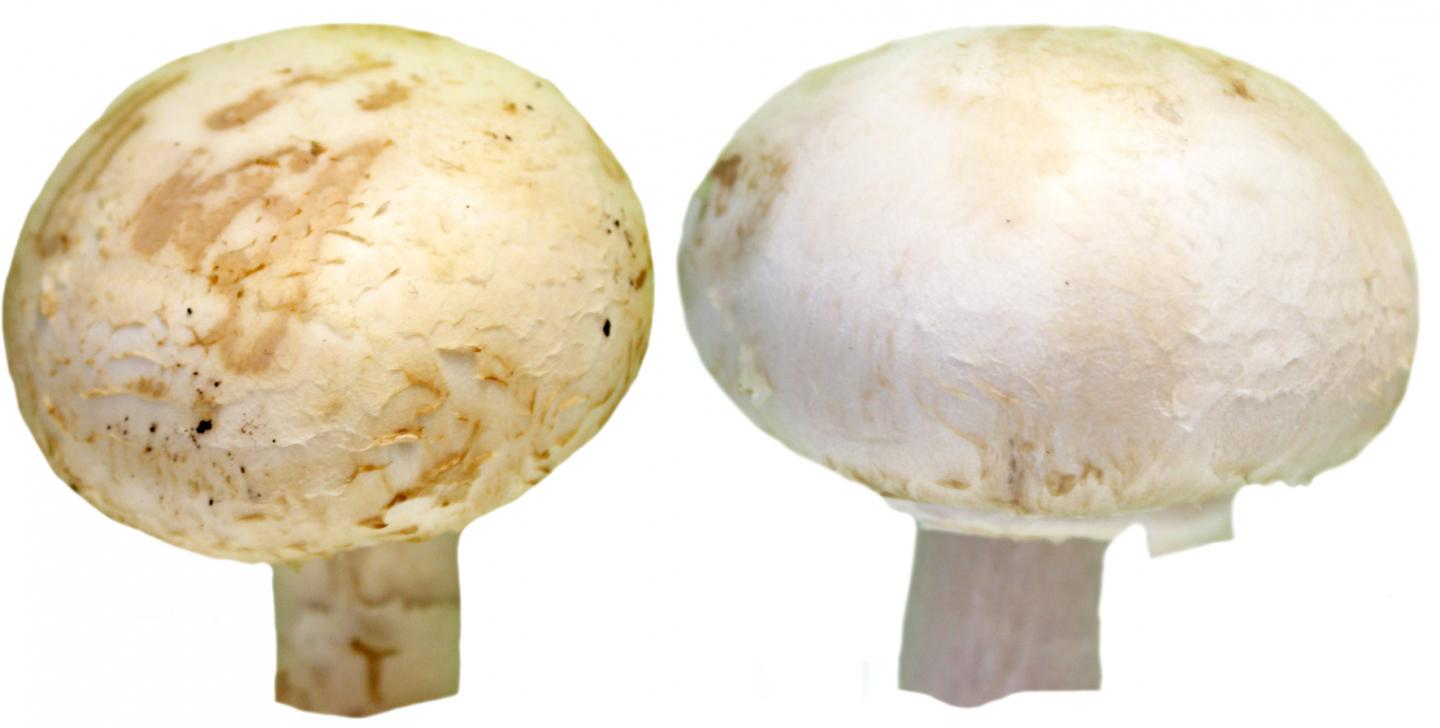

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/mushdata/train/bacterialblotch/241318_web.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

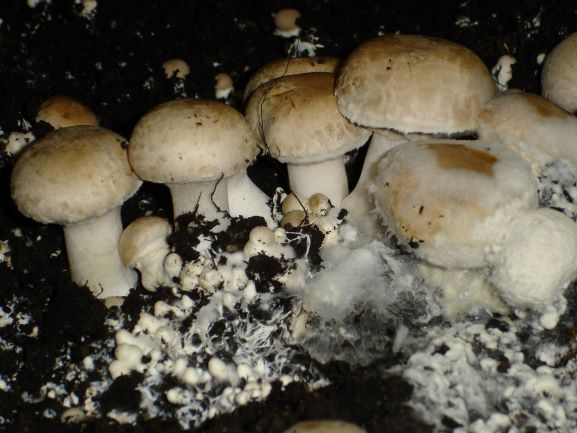

In [ ]:
image_path = '/content/drive/MyDrive/mushdata/train/cobweb/Fig 6 cobweb.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/mushdata/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/mushdata/validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 45 images belonging to 4 classes.
Found 35 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    batch_size=4,
                    epochs=11,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/11
2/2 [==============================] - 20s 14s/step - loss: 2.8544 - accuracy: 0.2444 - val_loss: 5.2398 - val_accuracy: 0.2857
Epoch 2/11
2/2 [==============================] - 7s 4s/step - loss: 4.8021 - accuracy: 0.2667 - val_loss: 2.8243 - val_accuracy: 0.2857
Epoch 3/11
2/2 [==============================] - 5s 4s/step - loss: 2.4972 - accuracy: 0.2444 - val_loss: 1.6917 - val_accuracy: 0.2286
Epoch 4/11
2/2 [==============================] - 6s 2s/step - loss: 1.6115 - accuracy: 0.2444 - val_loss: 1.3124 - val_accuracy: 0.4286
Epoch 5/11
2/2 [==============================] - 7s 5s/step - loss: 1.3397 - accuracy: 0.4667 - val_loss: 1.3194 - val_accuracy: 0.4000
Epoch 6/11
2/2 [==============================] - 5s 4s/step - loss: 1.3533 - accuracy: 0.2889 - val_loss: 1.3036 - val_accuracy: 0.3429
Epoch 7/11
2/2 [==============================] - 7s 5s/step - loss: 1.3206 - accuracy: 0.3333 - val_loss: 1.2807 - val_accuracy: 0.4286
Epoch 8/11
2/2 [=======================

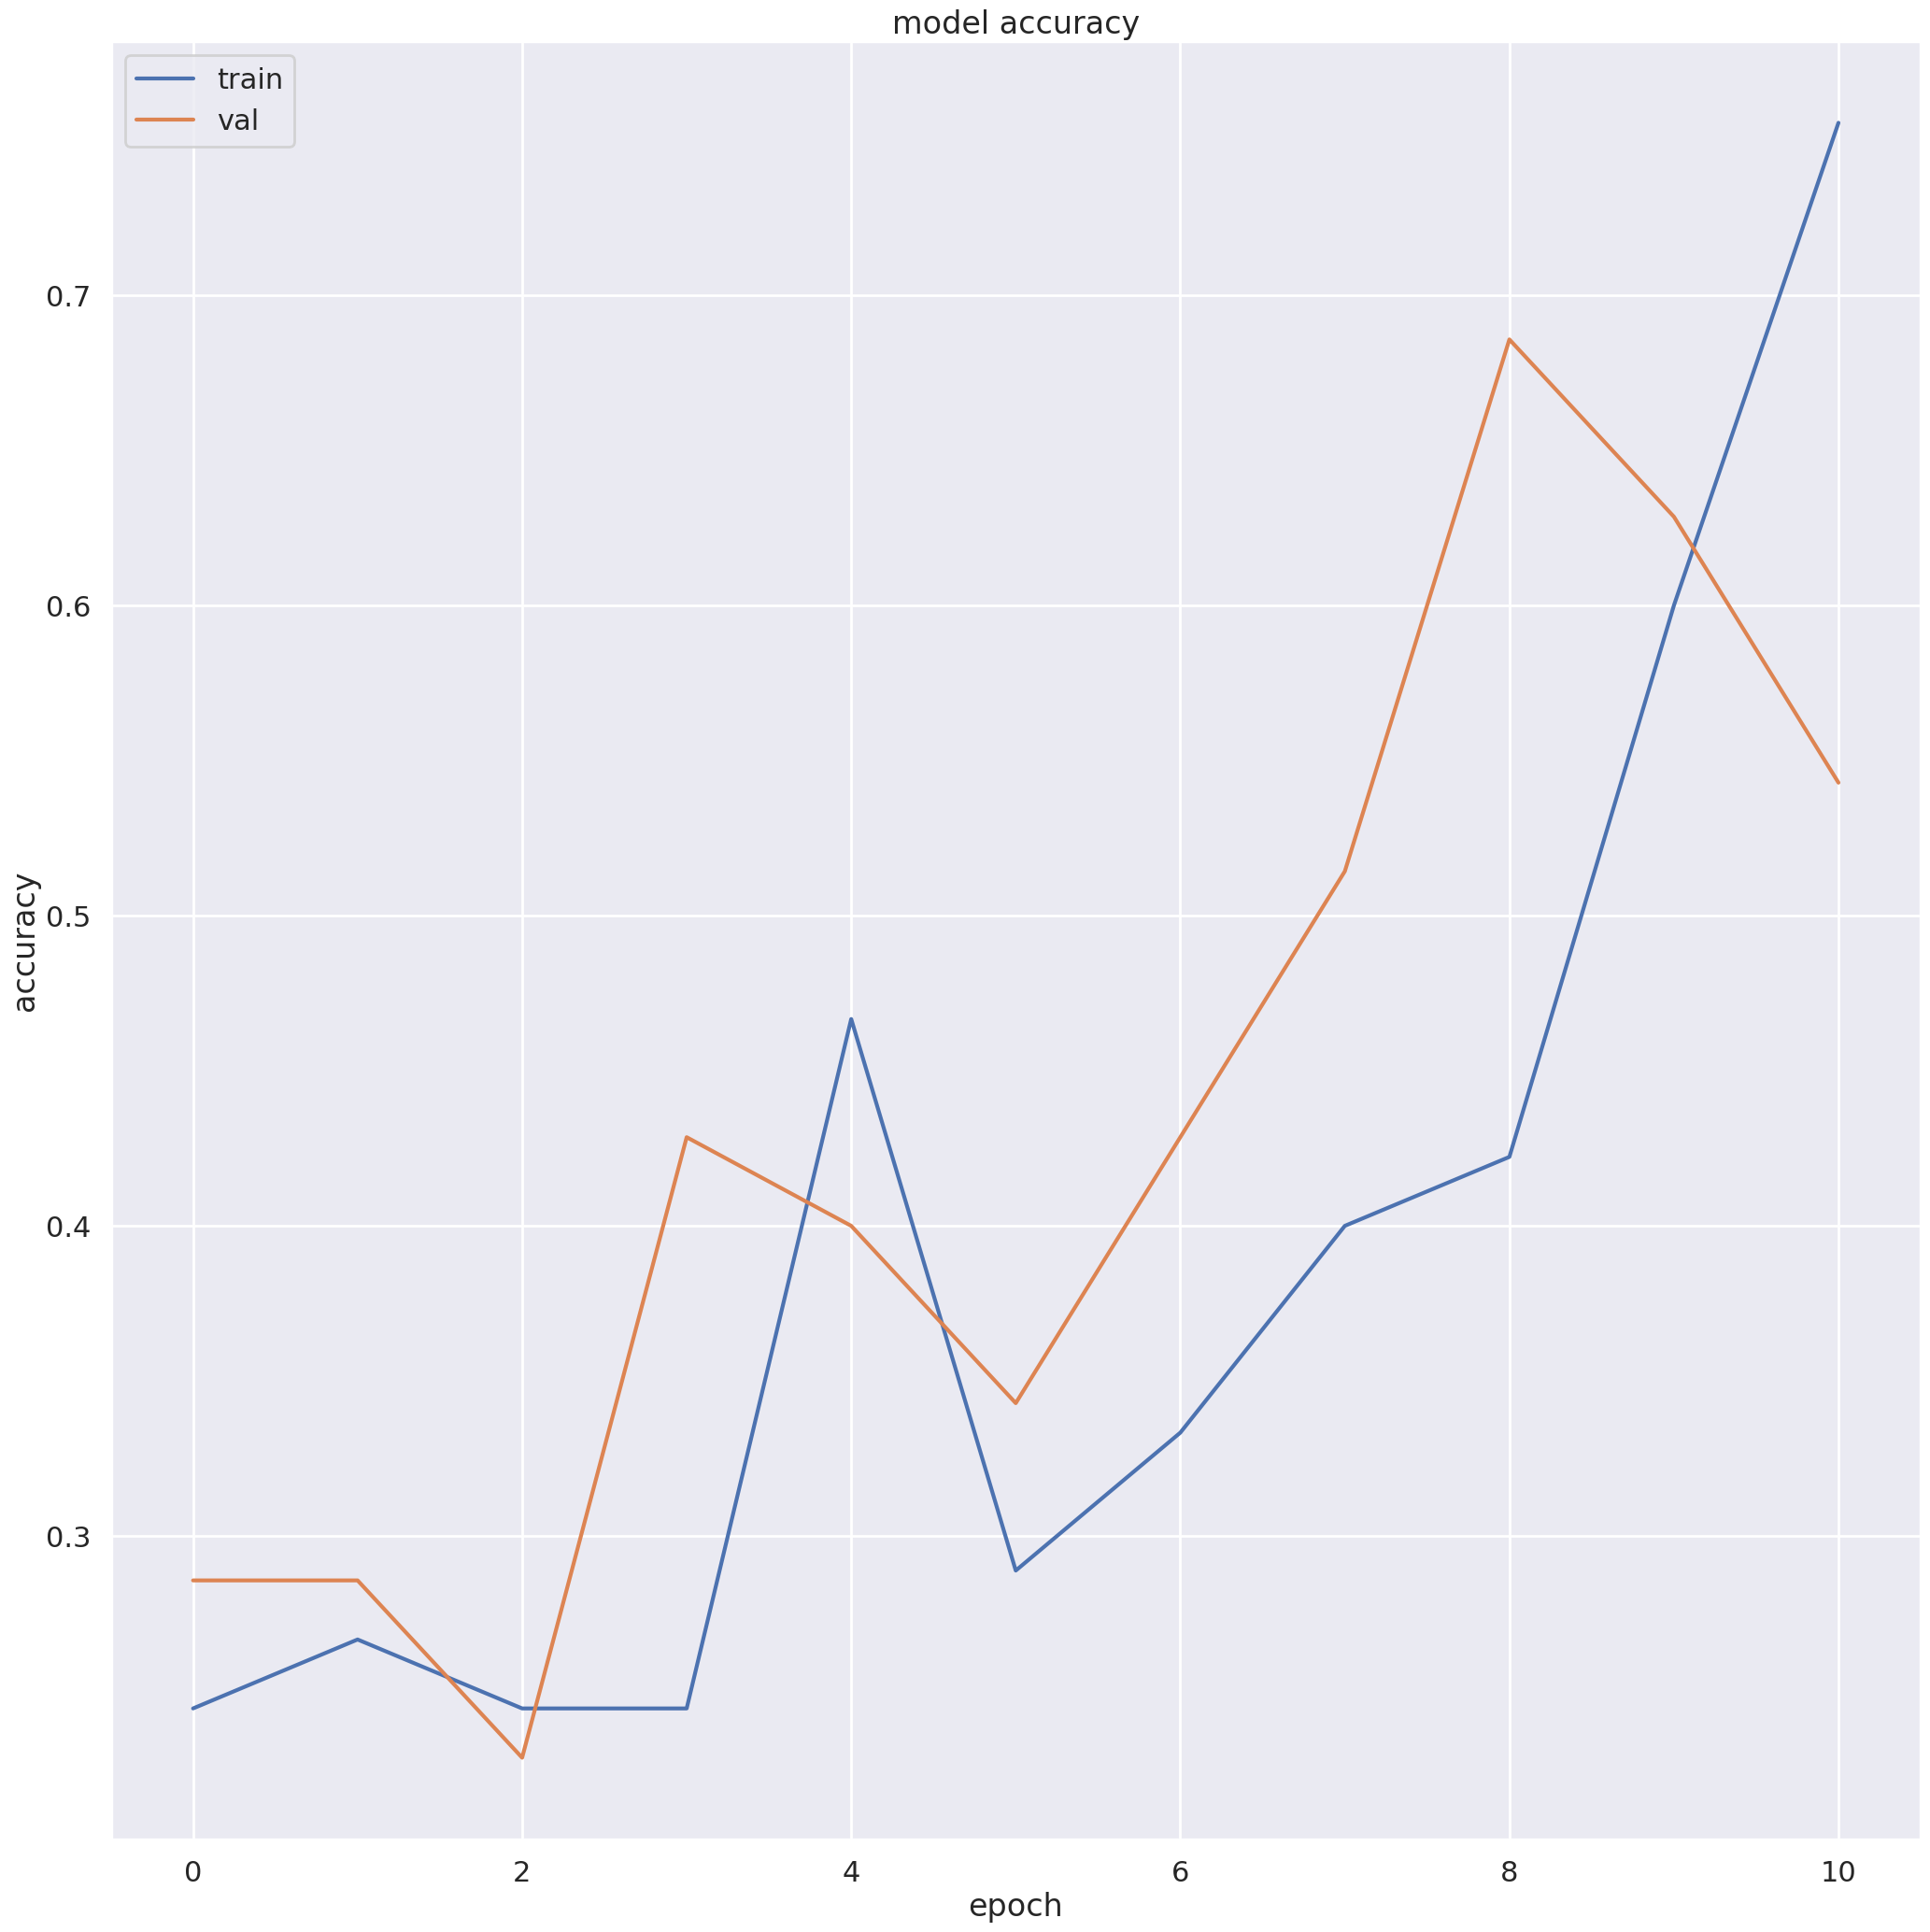

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("my_model.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/mushdata/test/drybubble/download (3).jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 132ms/step


array([3.3825831e-04, 7.5780213e-02, 8.5427159e-01, 6.9609955e-02],
      dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'bacterialblotch', 1: 'cobweb', 2: 'drybubble', 3: 'greenmould'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

drybubble


In [ ]:
import socket

def is_port_available(port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        return s.connect_ex(('localhost', port)) != 0

port = 8502  # Change this to your desired port number
if is_port_available(port):
    print(f"Port {port} is available.")
else:
    print(f"Port {port} is already in use.")


Port 8502 is available.


In [ ]:
with open('app.py', 'w') as f:
    f.write(_i)

In [ ]:

import streamlit as st
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from PIL import Image


# Load the Keras model
model_path = 'my_model.hdf5'
try:
    model = load_model(model_path)
except Exception as e:
    st.error(f"Error loading model: {e}")

# Function to preprocess the image
def preprocess_image(image):
    img = load_img(image, target_size=(225, 225))
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Function to make predictions
def predict(image_path):
    try:
        processed_image = preprocess_image(image_path)
        prediction = model.predict(processed_image)
        return prediction
    except Exception as e:
        st.error(f"Prediction error: {e}")

# Main function to run the Streamlit app
def main():
    st.title('Image Classification App')
    st.write('Upload an image for classification')

    # File uploader
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = np.array(Image.open(uploaded_file))
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Perform prediction when 'Predict' button is clicked
        if st.button('Predict'):
            prediction = predict(uploaded_file)
            st.write('Prediction:', prediction)

if __name__ == '__main__':
    main()




2024-03-05 12:23:29.792 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule debug@4.3.2 che


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.191.135:8501

npx: installed 22 in 3.585s
your url is: https://tiny-pigs-move.loca.lt
2024-03-05 12:24:21.941887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 12:24:21.941950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 12:24:21.943295: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 12:24:23.129277: W tensorflow/compiler/tf2tensorrt/utils/py_ut